In [105]:
import pandas as pd
import numpy as np

# Sample data
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva"],
    "Age": [25, 30, np.nan, 45, 22],
    "Gender": ["F", "M", "M", "--", "F"],
    "Score": [88.5, 92.3, 85.0, 90.1, "--"],
    "Department": ["HR", "Finance", "IT", "Finance", "HR"]
}

df = pd.DataFrame(data)


In [106]:
df

,Name,Age,Gender,Score,Department
0,Alice,25.0,F,88.5,HR
1,Bob,30.0,M,92.3,Finance
2,Charlie,NaN,M,85.0,IT
3,David,45.0,--,90.1,Finance
4,Eva,22.0,F,--,HR


In [107]:
# Axis = 0 (Operate column by column), Axis = 1(Operate row by row)

In [108]:
dfCheck = df[ df == "--"].any()
dfCheck

Name          False
Age           False
Gender         True
Score          True
Department    False
dtype: bool

In [109]:
dfCheck = df[df == '--'].any(axis = 1)
dfCheck

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [110]:
df[dfCheck]

,Name,Age,Gender,Score,Department
3,David,45.0,--,90.1,Finance
4,Eva,22.0,F,--,HR


In [111]:
dfIndex = df.set_index("Name")

In [112]:
dfIndex

,Age,Gender,Score,Department
Name,,,,
Alice,25.0,F,88.5,HR
Bob,30.0,M,92.3,Finance
Charlie,NaN,M,85.0,IT
David,45.0,--,90.1,Finance
Eva,22.0,F,--,HR


In [113]:
df

,Name,Age,Gender,Score,Department
0,Alice,25.0,F,88.5,HR
1,Bob,30.0,M,92.3,Finance
2,Charlie,NaN,M,85.0,IT
3,David,45.0,--,90.1,Finance
4,Eva,22.0,F,--,HR


In [114]:
df.dtypes

Name           object
Age           float64
Gender         object
Score          object
Department     object
dtype: object

In [115]:
df["Score"] = pd.to_numeric(df["Score"], errors="coerce")

In [116]:
df.dtypes

Name           object
Age           float64
Gender         object
Score         float64
Department     object
dtype: object

In [117]:
df["Rounded Score"] = df["Score"].round()

In [118]:
df

,Name,Age,Gender,Score,Department,Rounded Score
0,Alice,25.0,F,88.5,HR,88.0
1,Bob,30.0,M,92.3,Finance,92.0
2,Charlie,NaN,M,85.0,IT,85.0
3,David,45.0,--,90.1,Finance,90.0
4,Eva,22.0,F,NaN,HR,NaN


In [119]:
df.sample(2)

,Name,Age,Gender,Score,Department,Rounded Score
1,Bob,30.0,M,92.3,Finance,92.0
4,Eva,22.0,F,NaN,HR,NaN


In [120]:
dfAny = df[df == '--'].any(axis = 1)

In [121]:
dfAny

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [122]:
df[dfAny]

,Name,Age,Gender,Score,Department,Rounded Score
3,David,45.0,--,90.1,Finance,90.0


In [123]:
df

,Name,Age,Gender,Score,Department,Rounded Score
0,Alice,25.0,F,88.5,HR,88.0
1,Bob,30.0,M,92.3,Finance,92.0
2,Charlie,NaN,M,85.0,IT,85.0
3,David,45.0,--,90.1,Finance,90.0
4,Eva,22.0,F,NaN,HR,NaN


In [124]:
df.unstack()

Name           0      Alice
               1        Bob
               2    Charlie
               3      David
               4        Eva
Age            0       25.0
               1       30.0
               2        NaN
               3       45.0
               4       22.0
Gender         0          F
               1          M
               2          M
               3         --
               4          F
Score          0       88.5
               1       92.3
               2       85.0
               3       90.1
               4        NaN
Department     0         HR
               1    Finance
               2         IT
               3    Finance
               4         HR
Rounded Score  0       88.0
               1       92.0
               2       85.0
               3       90.0
               4        NaN
dtype: object

In [125]:
ages = [10, 20, 30, 40]
scores = [15, 25, 35, 45]

import pandas as pd
s1 = pd.Series(ages)
s2 = pd.Series(scores)

print(s1.corr(s2))

1.0


In [126]:
df.dtypes

Name              object
Age              float64
Gender            object
Score            float64
Department        object
Rounded Score    float64
dtype: object

In [127]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                    Age     Score  Rounded Score
Age            1.000000  0.151074       0.240192
Score          0.151074  1.000000       0.997742
Rounded Score  0.240192  0.997742       1.000000


In [128]:
df.select_dtypes("number").corr()


,Age,Score,Rounded Score
Age,1.000000,0.151074,0.240192
Score,0.151074,1.000000,0.997742
Rounded Score,0.240192,0.997742,1.000000


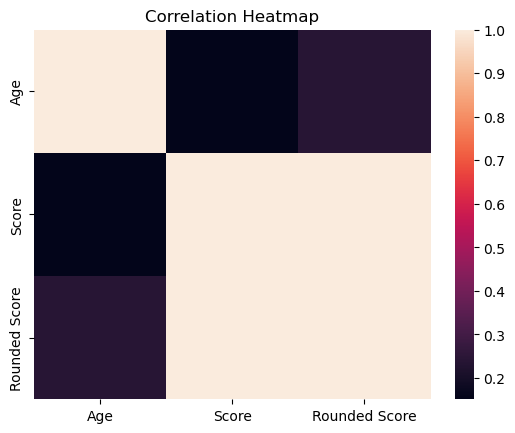

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.select_dtypes("number").corr())
plt.title("Correlation Heatmap")
plt.show()

In [130]:
unstacked = df.set_index(["Department", "Name"]).unstack()
unstacked


Age                           Gender                          \
Name       Alice   Bob Charlie David   Eva  Alice  Bob Charlie David  Eva   
Department                                                                  
Finance      NaN  30.0     NaN  45.0   NaN    NaN    M     NaN    --  NaN   
HR          25.0   NaN     NaN   NaN  22.0      F  NaN     NaN   NaN    F   
IT           NaN   NaN     NaN   NaN   NaN    NaN  NaN       M   NaN  NaN   

           Score                         Rounded Score                          
Name       Alice   Bob Charlie David Eva         Alice   Bob Charlie David Eva  
Department                                                                      
Finance      NaN  92.3     NaN  90.1 NaN           NaN  92.0     NaN  90.0 NaN  
HR          88.5   NaN     NaN   NaN NaN          88.0   NaN     NaN   NaN NaN  
IT           NaN   NaN    85.0   NaN NaN           NaN   NaN    85.0   NaN NaN

In [131]:
df.query("Age > 25")


,Name,Age,Gender,Score,Department,Rounded Score
1,Bob,30.0,M,92.3,Finance,92.0
3,David,45.0,--,90.1,Finance,90.0


In [132]:
print(pd.crosstab(df["Gender"], df["Department"]))


Department  Finance  HR  IT
Gender                     
--                1   0   0
F                 0   2   0
M                 1   0   1


In [133]:
df[df["Department"].isin(["HR", "IT"])]

,Name,Age,Gender,Score,Department,Rounded Score
0,Alice,25.0,F,88.5,HR,88.0
2,Charlie,NaN,M,85.0,IT,85.0
4,Eva,22.0,F,NaN,HR,NaN


In [134]:
df.nlargest(2, "Score")


,Name,Age,Gender,Score,Department,Rounded Score
1,Bob,30.0,M,92.3,Finance,92.0
3,David,45.0,--,90.1,Finance,90.0


In [135]:
print("Max Score:", df["Score"].max())
print("Min Score:", df["Score"].min())


Max Score: 92.3
Min Score: 85.0


In [136]:
names = "Alice,Bob,Charlie,David,Eva"
name_list = names.split(",")
unique_names = []

for name in name_list:
    if name not in unique_names:
        unique_names.append(name)

print("Unique Names:", unique_names)


Unique Names: ['Alice', 'Bob', 'Charlie', 'David', 'Eva']


<Axes: xlabel='Department', ylabel='Score'>

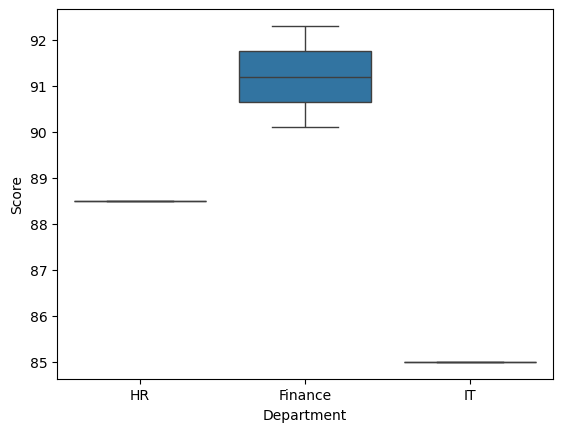

In [137]:
sns.boxplot(x='Department', y='Score', data=df)

<Axes: >

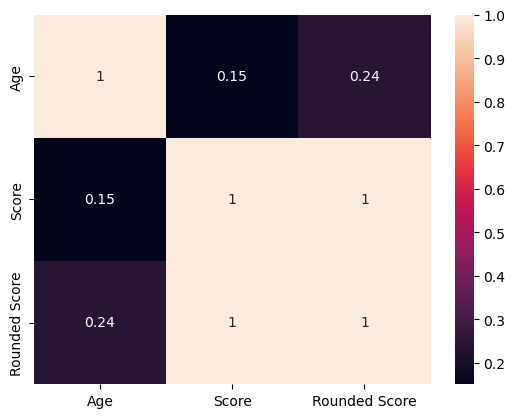

In [138]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

In [139]:
df

,Name,Age,Gender,Score,Department,Rounded Score
0,Alice,25.0,F,88.5,HR,88.0
1,Bob,30.0,M,92.3,Finance,92.0
2,Charlie,NaN,M,85.0,IT,85.0
3,David,45.0,--,90.1,Finance,90.0
4,Eva,22.0,F,NaN,HR,NaN


In [140]:
agg_df = df.groupby("Department").agg({"Score": ["mean", "max"], "Age": ["mean", "max"]})
agg_df

Score         Age      
            mean   max  mean   max
Department                        
Finance     91.2  92.3  37.5  45.0
HR          88.5  88.5  23.5  25.0
IT          85.0  85.0   NaN   NaN

In [141]:
agg_df.columns = ['_'.join(col) for col in agg_df.columns]
filtered_df = agg_df.query("Score_mean > 85")

filtered_df 


,Score_mean,Score_max,Age_mean,Age_max
Department,,,,
Finance,91.2,92.3,37.5,45.0
HR,88.5,88.5,23.5,25.0


In [142]:
pd.pivot_table(df, values="Score", index="Gender", columns="Department", aggfunc="mean")


Department,Finance,HR,IT
Gender,,,
--,90.1,NaN,NaN
F,NaN,88.5,NaN
M,92.3,NaN,85.0


In [143]:
import pandas as pd

data = {
    "Course Title": ["Python Basics", "Data Viz", "ML Intro", "Deep Learning", "SQL Mastery"],
    "Subject": ["Programming", "Visualization", "Machine Learning", "AI", "Databases"],
    "Published Year": [2022, 2021, 2023, 2023, 2022],
    "Reviews": [1200, 850, 2300, 1900, 1100],
    "Subscribers": [15000, 8000, 22000, 18000, 13000],
    "Price": [49, 39, 59, 79, 45]
}

courses_df = pd.DataFrame(data)

courses_df["Email"] = ["instructor1@udemy.com", "vizguru@coursera.org", "mlpro@edx.net", "deeplearn@udemy.com", "sqlking@coursera.org"]

domains = []
for email in courses_df["Email"]:
    domains.append(email.split("@")[1])

courses_df["Platform"] = domains

In [144]:
courses_df["Tags"] = ["Python,Beginner", "Charts,Matplotlib", "ML,Supervised", "Neural Nets,Advanced", "SQL,Queries"]

tag_list = []
for tags in courses_df["Tags"]:
    tag_list.extend(tags.split(","))

from collections import Counter
tag_counts = Counter(tag_list)
tag_counts

Counter({'Python': 1,
         'Beginner': 1,
         'Charts': 1,
         'Matplotlib': 1,
         'ML': 1,
         'Supervised': 1,
         'Neural Nets': 1,
         'Advanced': 1,
         'SQL': 1,
         'Queries': 1})

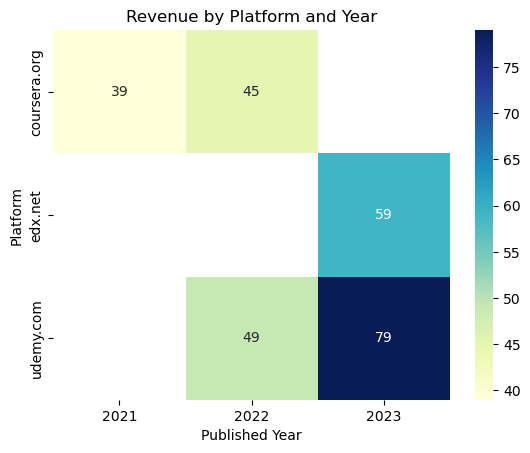

In [145]:
pivot = courses_df.pivot_table(index="Platform", columns="Published Year", values="Price", aggfunc="sum")
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Revenue by Platform and Year")
plt.show()


In [146]:
# One hot encoding

import pandas as pd

df = pd.DataFrame({
    "Department": ["HR", "Finance", "IT", "HR", "Finance"]
})

pd.get_dummies(df)


,Department_Finance,Department_HR,Department_IT
0,False,True,False
1,True,False,False
2,False,False,True
3,False,True,False
4,True,False,False
